In this tutorial, you will learn how to use Folium package to visualize data map  

<div class="alert alert-info"><h2>The data provided：</h2><p>   
    GIS file：<br>
    1.Administrative division of Shenzhen<br> 
    2.Grid of Shenzhen<br>  
    <br>  
    Data：<br>
    1.Taxi OD data<br>
 </p></div>

In [1]:
#Import necessary packages
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas
from shapely.geometry import Point,Polygon,shape

# Read data

## GIS data

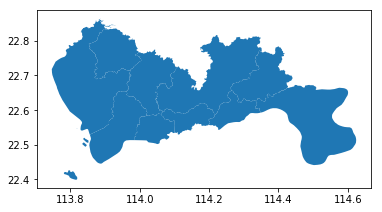

In [4]:
#Administrative division of Shenzhen
#read shapefile
shp = r'shapefile\sz.shp'
xzqh = geopandas.GeoDataFrame.from_file(shp,encoding = 'utf-8')

#Let's plot to see what it looks like
xzqh.plot()

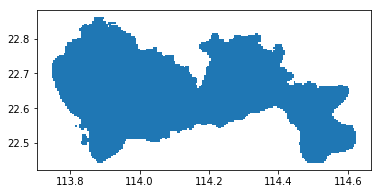

In [7]:
#Grid of Shenzhen
#read shapefile
shp = r'shapefile\grid\grid.shp'
grid = geopandas.GeoDataFrame.from_file(shp,encoding = 'gbk')

#Let's plot to see what it looks like
grid.plot()

## Grid OD data

This is the OD data we calculated last time

In [8]:
import pandas as pd
OD = pd.read_csv(r'data-sample\taxi_od_grid.csv')
OD.head(5)

SLONCOL  SLATCOL  ELONCOL  ELATCOL  VehicleNum
0       63       17       65       16         298
1       75       21       74       19         275
2       63       18       65       16         235
3       76       21       74       19         173
4       65       17       63       18         172

# Folium Package

Folium is the interface provided for Python by leaflet.js, a famous geographic information visualization library on JS. Through it, we can write code to manipulate data in Python to call relevant functions of leaflet. Based on the built-in OSM or self obtained OSM resources and original maps, we can visualize the content of geographic information and make beautiful interactive maps. Its format is similar to ggplot2, which is to define a map object by adding layer elements continuously. Finally, map objects are displayed in several ways.



In the form of map object generation, you can define all the layer contents, save them as HTML files and display them independently in the browser, or embed the corresponding interactive map in an ipynb file based on jupyter notebook. This tutorial adopts the latter corresponding method.


In [5]:
import folium

ModuleNotFoundError: No module named 'folium'

Ok, end of this tutorial 
   

No, let's continue, pip install folium  
Ok, installed

In [1]:
import folium

## Plot grids

Firstly, create map

In [3]:
#Let's see the parameters
?folium.Map

In [24]:
###########################You need to write code here#############################
# create a map at the centroid of xzqh
# with the zoom level at 10

###################################################################################

m

In [ ]:
###############################     Answer   ##################################

m = folium.Map(location=[xzqh.unary_union.centroid.y,xzqh.unary_union.centroid.x],
              zoom_start=10)

###################################################################################

m

Then, add something to the map

Folium's graphics drawing supports geojson format, which is a kind of geospatial data stored in json text format, similar to shp, but saved with another way

It's easy to get the geojson format from geopandas. Just use gpd.to_json() method:

In [25]:
folium.GeoJson(
    xzqh.to_json(),
    name='深圳行政区划'
).add_to(m)
m

In [16]:
###########################You need to write code here#############################
#We aggregate the ['sloncol ','slatcol'] fields of OD data
#which is to aggregate the O points

#Then merge OD data to the grid and name it gridtoplot
###################################################################################
gridtoplot.head(5)

LONCOL  LATCOL       HBLON      HBLAT  \
0       2      59  113.759249  22.710888   
1       3      49  113.764122  22.665922   
2       4      64  113.768994  22.733371   
3       4      65  113.768994  22.737868   
4       5      52  113.773867  22.679412   

                                            geometry  count  
0  POLYGON ((113.7568126140892 22.70864010197253,...      1  
1  POLYGON ((113.7616852281784 22.6636740499083, ...      1  
2  POLYGON ((113.7665578422676 22.73112312800465,...      1  
3  POLYGON ((113.7665578422676 22.73561973321107,...      1  
4  POLYGON ((113.7714304563568 22.67716386552757,...      1

In [ ]:
###############################     Answer   ##################################

O = OD.groupby(['SLONCOL','SLATCOL'])['VehicleNum'].sum().reset_index()
O.columns = ['LONCOL','LATCOL','count']
gridtoplot =pd.merge(grid,O,on = ['LONCOL','LATCOL'])

###################################################################################


In [23]:
#Here we only show the grids with more than 10 count
#Otherwise, the figure with too many objects will not be displayed

gridtoplot = gridtoplot[gridtoplot['count']>10]

In [26]:
#Okay, I've written this function
def foliumgridplot(m,grid,column,fill_color='YlOrRd',fill_opacity = 0.7,line_opacity =0.1,legend_name = '',name = ''):
    folium.Choropleth(
        name = name,
        geo_data=grid.reset_index().to_json(),
        data=grid[column].reset_index(),
        columns=['index', column],
        key_on='feature.properties.index',
        fill_color=fill_color,
        fill_opacity=fill_opacity,
        line_opacity=line_opacity,
        legend_name=legend_name
    ).add_to(m)
    return m

#use this function you can plot it easily
foliumgridplot(m,gridtoplot,'count',name = 'Distribution of O')

In [27]:
#Add a layer manager on the right
folium.LayerControl().add_to(m)

m

In [28]:
#Label Luohu railway station
folium.Marker([22.530967,114.113088],
              popup='Luohu railway station',
              icon=folium.Icon(icon='fa-train',prefix = 'fa')).add_to(m)
m

[There are many icons on this page](https://faicons.com/), you can use in folium

## Heatmap

In [29]:
gridtoplot[['HBLAT','HBLON','count']].head(5)

HBLAT       HBLON  count
23  22.688405  113.783612     15
24  22.692902  113.783612     15
41  22.670419  113.793357     16
42  22.674916  113.793357     33
43  22.679412  113.793357     35

Note: latitude before longitude

In [42]:
?HeatMap
#let's see the parameters

In [30]:
from folium.plugins import HeatMap
###########################You need to write code here#############################
#add heatmap on the map


###################################################################################
m

In [ ]:
from folium.plugins import HeatMap

###############################     Answer   ##################################
m = folium.Map(location=[xzqh.unary_union.centroid.y,xzqh.unary_union.centroid.x],
              zoom_start=11)

HeatMap(gridtoplot[['HBLAT','HBLON','count']].values,max_val=1,radius=13,blur = 25).add_to(m)

###################################################################################
m

The advantages of Folium are obvious. It needs little code to draw GIS map and has good compatibility with geopandas.

Folium is too laggy to visualize the graph with ten thousand objects.

So if you want to plot maps with elements reaches 10,000 level or plot multiple maps at a time, it's better to use **geopandas+matplotlib**

  
see more example：[Universe's largest gay dating website - github](https://github.com/python-visualization/folium)

# Homework

Try to draw taxi OD map with folium